In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.model_selection import LearningCurveDisplay

In [21]:
train_set = "dataset3_train.csv"
test_set = "dataset3_test.csv"

train_data = pd.read_csv(train_set, header=None, skiprows=1)
X_train_original = train_data.iloc[:, :-1].values.astype(float)
y_train_original = train_data.iloc[:, -1].values.astype(int)


test_data = pd.read_csv(test_set, header=None, skiprows=1)
X_test_original = test_data.iloc[:, :-1].values.astype(float)
y_test_original = test_data.iloc[:, -1].values.astype(int)

scaler = StandardScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
X_test = scaler.transform(X_test_original)

print(X_train.shape)
print(X_test.shape)

(100, 2)
(100, 2)


In [22]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Tested in Python 3.6.3, OSX El Capitan, and subsequent versions
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecArea(X_original, y_original, model, augmentation_method, order):
    x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
    y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid to pass into the augmentation method
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Augment the grid for plotting
    if order <= 3:
        grid_augmented = Polynomial_Mapping(grid, order)
    else:
        grid_augmented = augmentation_method.transform(grid)  # Use the fitted PolynomialFeatures object

    # Predict on the augmented grid
    Z = model.predict(grid_augmented)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    # You can specify the color for each class, for example 'red' for class 1, 'blue' for class 2
    scatter_colors = ['red' if y == 1 else 'blue' for y in y_original]
    plt.scatter(X_original[:, 0], X_original[:, 1], c=scatter_colors, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision surface for polynomial order {order}')
    plt.show()



In [24]:
import numpy as np

def Polynomial_Mapping(X, order=2):
    """
    Polynomial mapping function for orders less than 4.
    Args:
        X (ndarray (n, 2)): data before polynomial mapping, n examples with 2 features
        order (int): largest exponent in the polynomial mapping
    Returns:
        X_polynomial (ndarray): data after polynomial mapping
    """
    if order == 1:
        # Add a column of ones to include the bias term
        X_polynomial = np.hstack((np.ones((X.shape[0], 1)), X))
    elif order == 2:
        # Add the bias term, original features, squares, and cross term
        X_polynomial = np.hstack((np.ones((X.shape[0], 1)), X, X**2, (X[:, 0]*X[:, 1]).reshape(-1, 1)))
    elif order == 3:
        # Add the bias term, original features, squares, cross term, and cubes
        cross_terms = (X[:, 0]*X[:, 1]).reshape(-1, 1)
        X_polynomial = np.hstack((np.ones((X.shape[0], 1)), X, X**2, cross_terms, X[:, 0:1]**3, (X[:, 0]**2 * X[:, 1]).reshape(-1, 1), (X[:, 0] * X[:, 1]**2).reshape(-1, 1), X[:, 1:2]**3))
    else:
        raise ValueError("Order must be 1, 2, or 3 for manual polynomial mapping.")
    
    return X_polynomial


In [25]:
"""
Train the sklearn Perceptron model with the polynomial mapping you design (order =1,2,3)
For higher order (order>3), use sklearn PolynomialFeature()
The steps of training is:
  1. Polynomial mapping original feature (X, in 2D dimension) to new feature space (u) using either your implemented function or sklearn function
  2. Initialize sklearn Perceptron
  3. Train the Perceptron model using the features after polynomial mapping
  4. Evaluate the performance on both training and test
  5. Plot the decision area
"""
###########################
######Your code here#######
###########################

'\nTrain the sklearn Perceptron model with the polynomial mapping you design (order =1,2,3)\nFor higher order (order>3), use sklearn PolynomialFeature()\nThe steps of training is:\n  1. Polynomial mapping original feature (X, in 2D dimension) to new feature space (u) using either your implemented function or sklearn function\n  2. Initialize sklearn Perceptron\n  3. Train the Perceptron model using the features after polynomial mapping\n  4. Evaluate the performance on both training and test\n  5. Plot the decision area\n'

Order 1: Train Accuracy = 0.7100, Test Accuracy = 0.6700


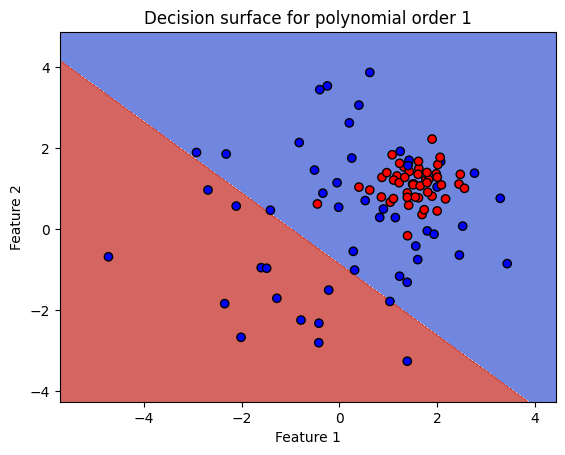

Order 2: Train Accuracy = 0.8700, Test Accuracy = 0.8800


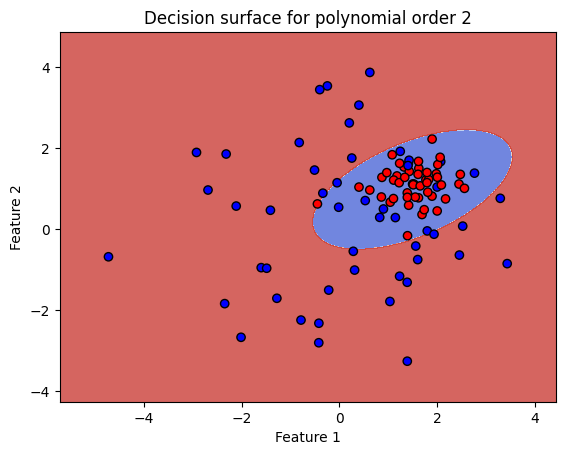

Order 3: Train Accuracy = 0.8800, Test Accuracy = 0.8700


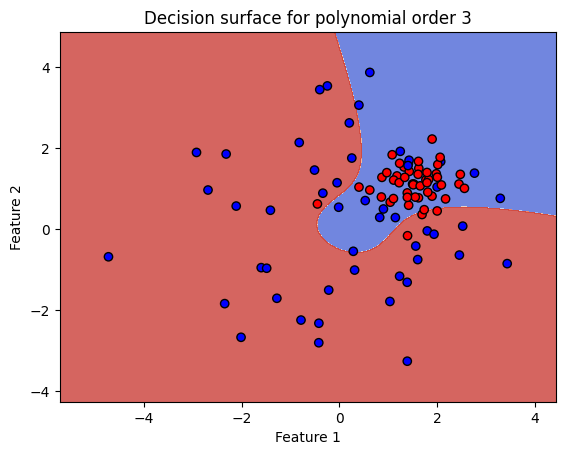

Order 4: Train Accuracy = 0.8500, Test Accuracy = 0.8600


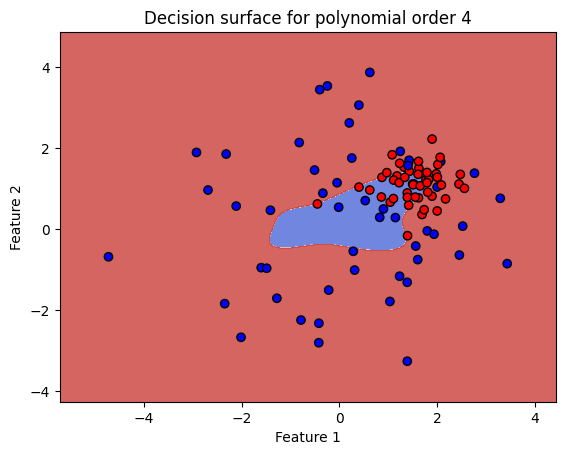

Order 5: Train Accuracy = 0.8500, Test Accuracy = 0.8900


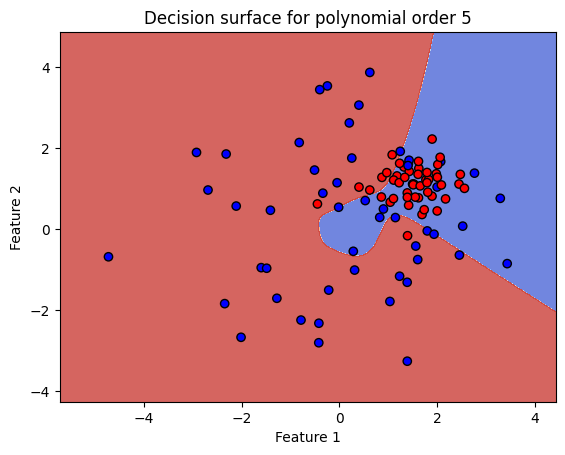

Order 6: Train Accuracy = 0.8300, Test Accuracy = 0.8600


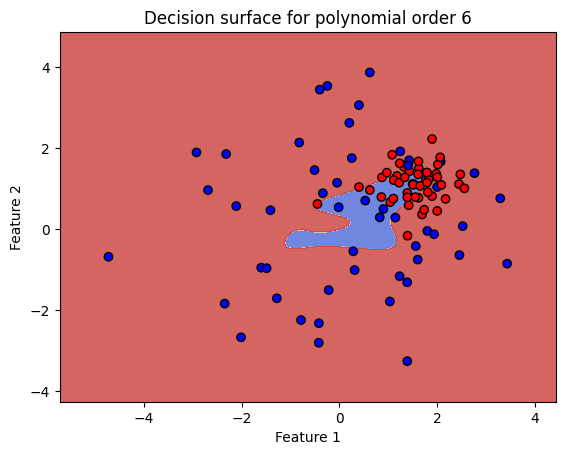

Order 7: Train Accuracy = 0.8500, Test Accuracy = 0.7900


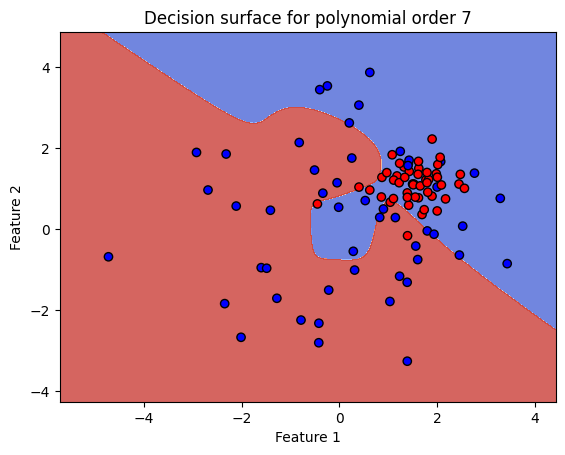

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Order 10: Train Accuracy = 0.8600, Test Accuracy = 0.8300


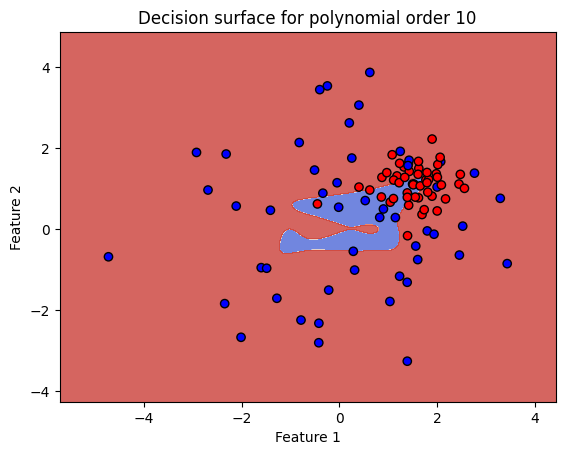

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Order 11: Train Accuracy = 0.7300, Test Accuracy = 0.6500


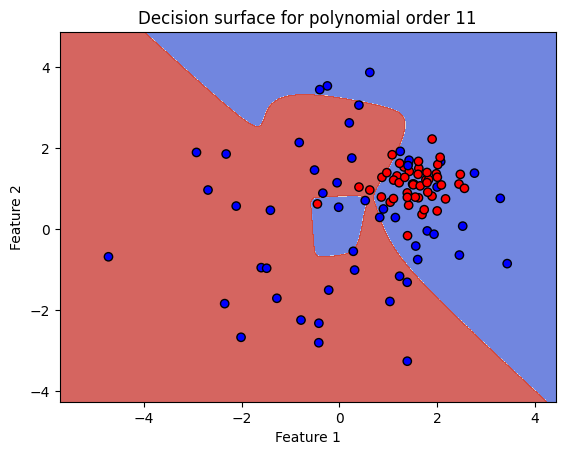

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Order 15: Train Accuracy = 0.7500, Test Accuracy = 0.7600


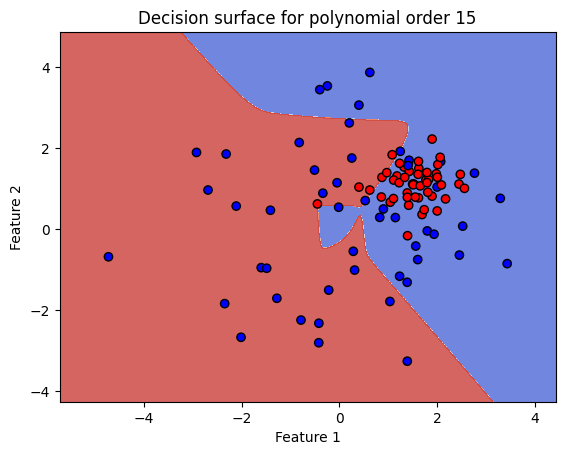

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron

# Define your orders list
orders = [1, 2, 3, 4, 5, 6, 7, 10, 11, 15]

# Define the shuffling variable
do_shuffle = True 

for order in orders:
    if order <= 3:
        # Use the manual Polynomial_Mapping for orders 1, 2, 3
        X_train_poly = Polynomial_Mapping(X_train, order)
        X_test_poly = Polynomial_Mapping(X_test, order)
    else:
        # Use PolynomialFeatures from sklearn for order > 3
        poly = PolynomialFeatures(degree=order)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
    
    # Initialize and train Perceptron with the shuffling variable
    model = Perceptron(shuffle=do_shuffle)
    model.fit(X_train_poly, y_train_original)
    
    # Evaluate the performance
    train_accuracy = model.score(X_train_poly, y_train_original)
    test_accuracy = model.score(X_test_poly, y_test_original)
    print(f"Order {order}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # Plot the decision area
    # For plotting, we need to pass the augmentation_method that was used
    augmentation_method = Polynomial_Mapping if order <= 3 else poly
    plotDecArea(X_train_original, y_train_original, model, augmentation_method, order)


In [27]:
import pandas as pd

# Assuming each dataset has 100 data points
number_of_data_points = 100  

# Create a DataFrame to hold the table data
table_data = {
    'Polynomial Degree': list(range(1, 22)),
    'Degrees of Freedom (d.o.f)': [(degree + 1) * (degree + 2) // 2 for degree in range(1, 22)],
    'Number of Constraints': [number_of_data_points] * 21
}

# Create a DataFrame
df = pd.DataFrame(table_data)

# Set the DataFrame to display all rows if you're using Jupyter Notebooks or other interactive environments
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(df)


    Polynomial Degree  Degrees of Freedom (d.o.f)  Number of Constraints
0                   1                           3                    100
1                   2                           6                    100
2                   3                          10                    100
3                   4                          15                    100
4                   5                          21                    100
5                   6                          28                    100
6                   7                          36                    100
7                   8                          45                    100
8                   9                          55                    100
9                  10                          66                    100
10                 11                          78                    100
11                 12                          91                    100
12                 13                         105  